<a href="https://colab.research.google.com/github/MelksonF/ProjetoIntegrado_CDBG_PUC/blob/main/Script_Projeto_Integrado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import re
import seaborn as sns
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,f1_score,accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm, tree
import xgboost
import lightgbm as lgb
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_validate,GridSearchCV
from scipy.stats import uniform as sp_uniform
from matplotlib.pyplot import figure
from mlxtend.plotting import plot_confusion_matrix


import warnings
warnings.filterwarnings('ignore')

# Importação da base

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Caminho do drive onde está localizada a base
mypath = '/content/drive/MyDrive/Colab Notebooks/Projeto integrado de ciencia de dados/'

Mounted at /content/drive


In [ ]:
# importanto o csv da base com o pandas
df_base = pd.read_csv(mypath+'dataset_projeto_integrado.csv')

# Análise Iniciais da Base

In [ ]:
#Formatar campos de valores numericos
pd.options.display.float_format = '{:.2f}'.format

Shape (tamanho) da base 

In [ ]:
df_base.shape

(1961, 17)

Colunas da base

In [ ]:
df_base.columns

Index(['nome', 'data_inicio', 'escritorio', 'area', 'tipo', 'palavras_chaves',
       'origem', 'iniciais_originadores', 'valor_da_transacao',
       'valor_fee_sucesso', 'valor_fee_mensal', 'expectativa_fechamento',
       'status_atual', 'data_conclusao_conforme_status',
       'qtde_negocios_com_o_cliente', 'ult_interacao', 'interesse(target)'],
      dtype='object')

Informação da base

In [ ]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   nome                            1961 non-null   object 
 1   data_inicio                     1961 non-null   object 
 2   escritorio                      1586 non-null   object 
 3   area                            1961 non-null   object 
 4   tipo                            1961 non-null   object 
 5   palavras_chaves                 416 non-null    object 
 6   origem                          54 non-null     object 
 7   iniciais_originadores           1640 non-null   object 
 8   valor_da_transacao              610 non-null    float64
 9   valor_fee_sucesso               538 non-null    float64
 10  valor_fee_mensal                353 non-null    float64
 11  expectativa_fechamento          1009 non-null   object 
 12  status_atual                    19

Demonstração dos 10 primeiros registros

In [ ]:
df_base.head(10)

,nome,data_inicio,escritorio,area,tipo,palavras_chaves,origem,iniciais_originadores,valor_da_transacao,valor_fee_sucesso,valor_fee_mensal,expectativa_fechamento,status_atual,data_conclusao_conforme_status,qtde_negocios_com_o_cliente,ult_interacao,interesse(target)
0,negocio1,03/09/2018,Araujo Fontes BH,M&A Sell Side,Lead,NaN,NaN,BD,NaN,NaN,NaN,31/10/2018,Concluído sem sucesso,NaN,1,10/01/2019,5.00
1,negocio6,10/10/2018,Araujo Fontes BH,Imobiliário,Projeto,NaN,NaN,EF,25000000.00,500000.00,NaN,30/11/2020,Ativo,NaN,3,25/08/2020,2.00
2,negocio7,17/09/2018,Araujo Fontes BH,M&A Sell Side,Lead,NaN,NaN,"LK,MB",70000000.00,NaN,NaN,16/11/2018,Concluído sem sucesso,01/07/2019,2,06/06/2019,NaN
3,negocio11,11/10/2018,Araujo Fontes BH,Imobiliário,Lead,NaN,NaN,NaN,75000000.00,NaN,NaN,30/11/2018,Concluído sem sucesso,NaN,1,13/12/2018,NaN
4,negocio12,03/10/2018,Araujo Fontes BH,Imobiliário,Lead,NaN,NaN,NaN,NaN,NaN,NaN,22/11/2018,Inativo,NaN,1,13/12/2018,5.00
5,negocio13,01/10/2018,Araujo Fontes BH,M&A Sell Side,Lead,NaN,NaN,NaN,5000000.00,NaN,NaN,31/10/2018,Concluído sem sucesso,NaN,1,13/12/2018,NaN
6,negocio15,22/10/2018,Araujo Fontes BH,Assessoria Estratégica,Lead,NaN,NaN,NaN,250000000.00,5000000.00,NaN,31/12/2018,Concluído sem sucesso,NaN,1,13/12/2018,4.00
7,negocio18,18/07/2018,Araujo Fontes BH,Imobiliário,Lead,NaN,NaN,NaN,40000000.00,NaN,NaN,31/12/2020,Inativo,NaN,1,25/06/2019,NaN
8,negocio19,10/04/2018,Araujo Fontes BH,Imobiliário,Lead,NaN,NaN,NaN,2400000000.00,NaN,NaN,31/12/2020,Ativo,NaN,1,13/12/2018,NaN
9,negocio21,23/10/2018,Araujo Fontes BH,Imobiliário,Lead,NaN,NaN,NaN,20000000.00,NaN,NaN,31/12/2018,Ativo,NaN,1,26/12/2018,4.00


Informações das colunas númericas

In [ ]:
df_base.describe()

,valor_da_transacao,valor_fee_sucesso,valor_fee_mensal,qtde_negocios_com_o_cliente,interesse(target)
count,610.00,538.00,353.00,1961.00,1058.00
mean,96468748.24,1727343.46,53071731.61,2.33,2.59
std,274766815.22,2636951.06,666565332.17,3.61,1.42
min,0.00,0.00,441.94,0.00,1.00
25%,16283588.75,500000.00,90000.00,1.00,1.00
50%,40000000.00,1000000.00,128000.00,1.00,2.00
75%,100000000.00,2000000.00,240000.00,2.00,4.00
max,5000000000.00,40000000.00,12000000000.00,29.00,5.00


Quantidade de registros nulos

In [ ]:
df_base.isnull().sum()

nome                                 0
data_inicio                          0
escritorio                         375
area                                 0
tipo                                 0
palavras_chaves                   1545
origem                            1907
iniciais_originadores              321
valor_da_transacao                1351
valor_fee_sucesso                 1423
valor_fee_mensal                  1608
expectativa_fechamento             952
status_atual                         0
data_conclusao_conforme_status    1145
qtde_negocios_com_o_cliente          0
ult_interacao                        0
interesse(target)                  903
dtype: int64

# Pré-Processamento da base



## Dados que não serão utilizados

- remover os negocios que possui o tipo Institucional

In [ ]:
df_base.drop(df_base.loc[df_base['tipo']=='Institucional'].index, inplace=True)

## Registros Nulos


- os escritorios que tiverem null, considerar como Araujo Fontes BH
- as origens nulas, consideram como Interno
- valor_da_transacao, valor_fee_sucesso e valor_fee_mensal, considerar como 0 os nulos
- Interesse, quando for null, considerar como 5

- Data conclusão conforme status quando for null, caso status seja:
    - Concluido com sucesso: pegar o dado dá coluna de ult interação
    - Concluido sem sucesso: pegar o dado dá coluna de ult interação
    

- Expectativa de fechamento quando for null, caso status seja:
    - Concluido com sucesso: pegar o dado da coluna data conclusao conforme status
    - Concluido sem sucesso: pegar o dado da coluna data conclusao conforme status

    
    

In [ ]:
df_base["escritorio"].fillna("Araujo Fontes BH", inplace=True)
df_base["origem"].fillna("Interno", inplace=True)
df_base["valor_da_transacao"].fillna(0, inplace=True)
df_base["valor_fee_sucesso"].fillna(0, inplace=True)
df_base["valor_fee_mensal"].fillna(0, inplace=True)
df_base["interesse(target)"].fillna(5, inplace=True)
df_base.loc[(df_base['data_conclusao_conforme_status'].isna()) & ((df_base['status_atual'] =='Concluído sem sucesso') ^ (df_base['status_atual'] =='Concluído com sucesso')), 'data_conclusao_conforme_status'] = df_base["ult_interacao"]
df_base.loc[(df_base['expectativa_fechamento'].isna()) & ((df_base['status_atual'] =='Concluído sem sucesso') ^ (df_base['status_atual'] =='Concluído com sucesso')), 'expectativa_fechamento'] = df_base["data_conclusao_conforme_status"]

In [ ]:
df_base

,nome,data_inicio,escritorio,area,tipo,palavras_chaves,origem,iniciais_originadores,valor_da_transacao,valor_fee_sucesso,valor_fee_mensal,expectativa_fechamento,status_atual,data_conclusao_conforme_status,qtde_negocios_com_o_cliente,ult_interacao,interesse(target)
0,negocio1,03/09/2018,Araujo Fontes BH,M&A Sell Side,Lead,NaN,Interno,BD,0.00,0.00,0.00,31/10/2018,Concluído sem sucesso,10/01/2019,1,10/01/2019,5.00
1,negocio6,10/10/2018,Araujo Fontes BH,Imobiliário,Projeto,NaN,Interno,EF,25000000.00,500000.00,0.00,30/11/2020,Ativo,NaN,3,25/08/2020,2.00
2,negocio7,17/09/2018,Araujo Fontes BH,M&A Sell Side,Lead,NaN,Interno,"LK,MB",70000000.00,0.00,0.00,16/11/2018,Concluído sem sucesso,01/07/2019,2,06/06/2019,5.00
3,negocio11,11/10/2018,Araujo Fontes BH,Imobiliário,Lead,NaN,Interno,NaN,75000000.00,0.00,0.00,30/11/2018,Concluído sem sucesso,13/12/2018,1,13/12/2018,5.00
4,negocio12,03/10/2018,Araujo Fontes BH,Imobiliário,Lead,NaN,Interno,NaN,0.00,0.00,0.00,22/11/2018,Inativo,NaN,1,13/12/2018,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1956,negocio2252,02/02/2022,Araujo Fontes BH,Dívida Captação,Lead,NaN,Externo,NaN,0.00,0.00,0.00,31/08/2022,Ativo,NaN,1,02/02/2022,4.00
1957,negocio2253,17/01/2022,Araujo Fontes BH,Dívida Captação,Lead,NaN,Interno,EF,0.00,0.00,0.00,30/04/2022,Ativo,NaN,4,04/02/2022,1.00
1958,negocio2254,04/02/2022,Araujo Fontes BH,Dívida Captação,Lead,DCM CRI CRA FIDC,Interno,FB,0.00,0.00,0.00,25/02/2022,Ativo,NaN,6,04/02/2022,1.00
1959,negocio2255,04/02/2022,Araujo Fontes BH,Dívida Captação,Lead,DCM,Interno,FB,0.00,0.00,0.00,25/03/2022,Ativo,NaN,3,07/02/2022,1.00


In [ ]:
df_base.isnull().sum()

nome                                 0
data_inicio                          0
escritorio                           0
area                                 0
tipo                                 0
palavras_chaves                   1544
origem                               0
iniciais_originadores              321
valor_da_transacao                   0
valor_fee_sucesso                    0
valor_fee_mensal                     0
expectativa_fechamento             530
status_atual                         0
data_conclusao_conforme_status     903
qtde_negocios_com_o_cliente          0
ult_interacao                        0
interesse(target)                    0
dtype: int64

## Calcular duração do negócio para os status Concluido com sucesso e Sem sucesso

- calcular a diferença de dias entre data de inicio e data conclusao conforme status

In [ ]:
df_base["data_conclusao_conforme_status"]=pd.to_datetime(df_base["data_conclusao_conforme_status"])
df_base["data_inicio"]=pd.to_datetime(df_base["data_inicio"])


In [ ]:
days = df_base["data_conclusao_conforme_status"] - df_base["data_inicio"]
days_diff = days.dt.days
df_base["diferenca_dias_inclusao_conclusao"]= days_diff

In [ ]:
r = df_base[df_base["data_conclusao_conforme_status"].notna()]

r[['nome', 'data_inicio', 'data_conclusao_conforme_status', 'diferenca_dias_inclusao_conclusao']].shape

(1056, 4)

## Processamento da target

- criar uma nova coluna , chamada interesse_name, onde:
    - Alto: 1
    - Médio: 2 e 3 
    - Baixo: 4 e 5

In [ ]:
for i,row in df_base.iterrows():
    if  row['interesse(target)'] == 1:        
        df_base.at[i,'class_interesse'] = 'Alto'
    elif  row['interesse(target)'] >=2 and  row['interesse(target)'] <= 3:
         df_base.at[i,'class_interesse'] = 'Médio'
    elif   row['interesse(target)'] >= 4:
         df_base.at[i,'class_interesse'] = 'Baixo'


In [ ]:
df_base[['interesse(target)', 'class_interesse']]

,interesse(target),class_interesse
0,5.00,Baixo
1,2.00,Médio
2,5.00,Baixo
3,5.00,Baixo
4,5.00,Baixo
...,...,...
1956,4.00,Baixo
1957,1.00,Alto
1958,1.00,Alto
1959,1.00,Alto


# Analises Estatisticas

Categorizando as colunas

In [ ]:
df_base['escritorio_cat']=df_base['escritorio'].astype('category').cat.codes
df_base['area_cat']=df_base['area'].astype('category').cat.codes
df_base['tipo_cat']=df_base['tipo'].astype('category').cat.codes
df_base['origem_cat']=df_base['origem'].astype('category').cat.codes
df_base['status_atual_cat']=df_base['status_atual'].astype('category').cat.codes
df_base['class_interesse_cat']=df_base['class_interesse'].astype('category').cat.codes


Correlação dos dados

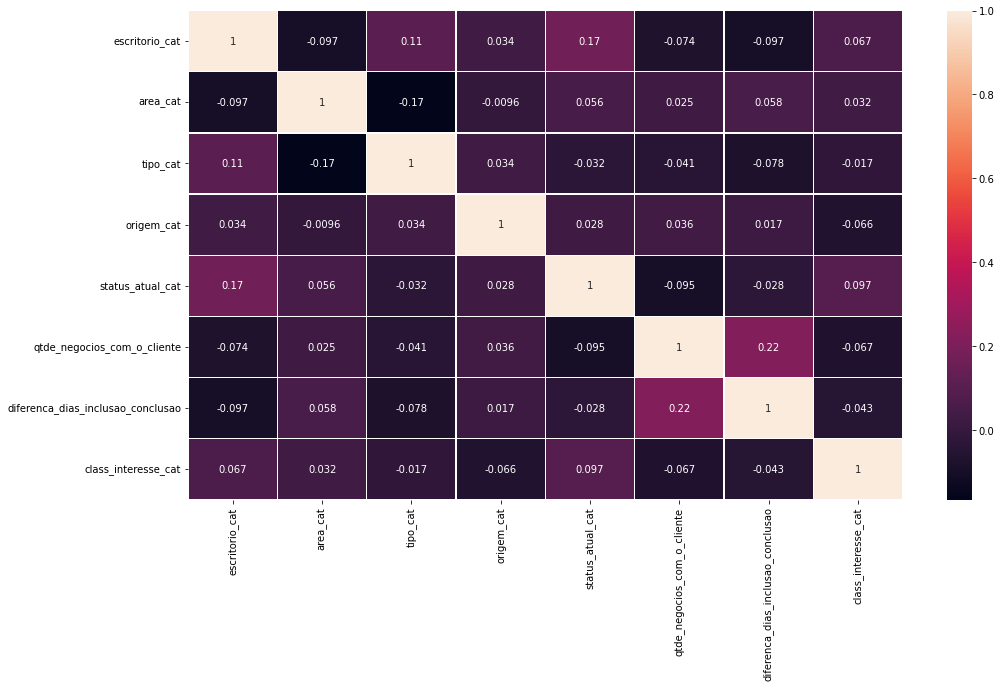

In [ ]:
base_corr = df_base[['escritorio_cat', 'area_cat', 'tipo_cat', \
                     'origem_cat', 'status_atual_cat', 'qtde_negocios_com_o_cliente', \
                     'diferenca_dias_inclusao_conclusao', 'class_interesse_cat']]
base_corr.corr()

plt.figure(figsize=(16,9))
sns.heatmap(base_corr.corr(),linewidth = 0.30, annot = True)
plt.show()

## Coluna Escritório

### Univariada

In [ ]:
# informações da coluna
print('Informações da coluna:')
print("\n",df_base['escritorio'].describe())

# dados distintos
print("\nDados distintos")
print(df_base['escritorio'].unique())

Informações da coluna:

 count                 1959
unique                   4
top       Araujo Fontes BH
freq                  1651
Name: escritorio, dtype: object

Dados distintos
['Araujo Fontes BH' 'Araujo Fontes Goiânia' 'Araujo Fontes Rib. Preto'
 'Araujo Fontes São Paulo']


### Multivariada

Quantidade de negocios por status por escritorio (em percentual)

In [ ]:
negocios_status_escritorio = pd.DataFrame(df_base.groupby(['escritorio','status_atual']).agg({'nome': 'count'}).reset_index())
negocios_status_escritorio.rename(columns={'nome': 'T_Esc_Status_Neg'}, inplace=True)

negocios_escritorio = pd.DataFrame(df_base.groupby(['escritorio']).agg({'nome': 'count'}).reset_index())
negocios_escritorio.rename(columns={'nome': 'T_Esc_Neg'}, inplace=True)

g = pd.merge(negocios_status_escritorio, negocios_escritorio, how = 'inner', on = 'escritorio')

g['percentual'] = (g['T_Esc_Status_Neg'] / 
                  g['T_Esc_Neg']) *100

g

,escritorio,status_atual,T_Esc_Status_Neg,T_Esc_Neg,percentual
0,Araujo Fontes BH,Ativo,722,1651,43.73
1,Araujo Fontes BH,Concluído com sucesso,129,1651,7.81
2,Araujo Fontes BH,Concluído sem sucesso,703,1651,42.58
3,Araujo Fontes BH,Inativo,97,1651,5.88
4,Araujo Fontes Goiânia,Ativo,14,144,9.72
5,Araujo Fontes Goiânia,Concluído com sucesso,5,144,3.47
6,Araujo Fontes Goiânia,Concluído sem sucesso,124,144,86.11
7,Araujo Fontes Goiânia,Inativo,1,144,0.69
8,Araujo Fontes Rib. Preto,Ativo,15,57,26.32
9,Araujo Fontes Rib. Preto,Concluído com sucesso,6,57,10.53


Valor da transação, Fee Sucesso	e Fee Mensal por escritorio

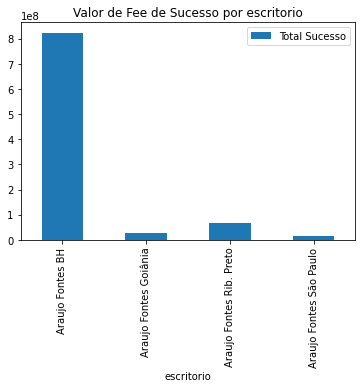

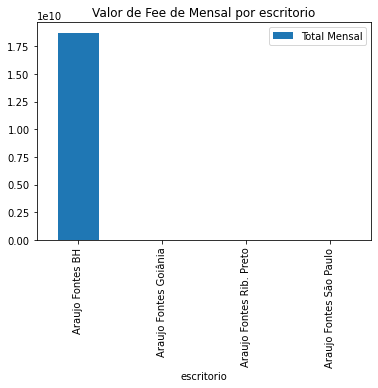

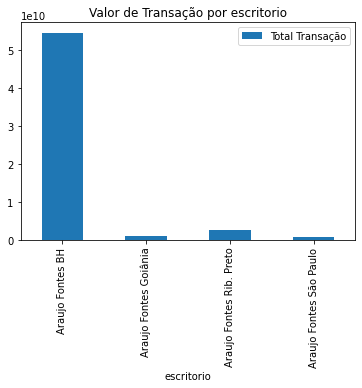

In [ ]:
fee_escritorio_sucesso = df_base.groupby(['escritorio']).agg({
                             'valor_fee_sucesso': [('Total Sucesso', 'sum')]
                             })
fee_escritorio_sucesso_graph = pd.concat([fee_escritorio_sucesso],axis=0).plot.bar()
fee_escritorio_sucesso_graph.set_title('Valor de Fee de Sucesso por escritorio')
handler, labels = fee_escritorio_sucesso_graph.get_legend_handles_labels()
editar_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
fee_escritorio_sucesso_graph.legend(editar_labels,bbox_to_anchor=(1,1), loc=0)

fee_escritorio_mensal = df_base.groupby(['escritorio']).agg({
                              'valor_fee_mensal': [('Total Mensal', 'sum')]
                              })
fee_escritorio_mensal_graph = pd.concat([fee_escritorio_mensal],axis=1).plot.bar()
fee_escritorio_mensal_graph.set_title('Valor de Fee de Mensal por escritorio')
handler, labels = fee_escritorio_mensal_graph.get_legend_handles_labels()
editar_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
fee_escritorio_mensal_graph.legend(editar_labels,bbox_to_anchor=(1,1), loc=0)

fee_escritorio_transacao = df_base.groupby(['escritorio']).agg({
                              'valor_da_transacao': [('Total Transação', 'sum')]
                              })

fee_escritorio_transacao_graph = pd.concat([fee_escritorio_transacao],axis=1).plot.bar()
fee_escritorio_transacao_graph.set_title('Valor de Transação por escritorio')
handler, labels = fee_escritorio_transacao_graph.get_legend_handles_labels()
editar_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
fee_escritorio_transacao_graph.legend(editar_labels,bbox_to_anchor=(1,1), loc=0)



## Coluna Data Inicio

### Univariada

In [ ]:
# informações da coluna
print('Informações da coluna:')
print("\n",df_base['data_inicio'].describe())


Informações da coluna:

 count                    1959
unique                    830
top       2018-12-12 00:00:00
freq                       50
first     2008-09-09 00:00:00
last      2022-11-01 00:00:00
Name: data_inicio, dtype: object


### Multivariada

- quantidade de negocios ano e por area


In [ ]:
df2 = df_base.groupby([df_base['data_inicio'].dt.strftime('%Y'), df_base["area"]]).agg({'nome':'count'}).reset_index()
df2.rename(columns={'nome': 'T_Neg'}, inplace=True)
df2

,data_inicio,area,T_Neg
0,2008,Gestão de Recursos,1
1,2009,Gestão de Recursos,3
2,2010,Gestão de Recursos,1
3,2013,Consultoria,1
4,2013,Gestão de Recursos,1
...,...,...,...
79,2022,Dívida Captação,11
80,2022,Gestão de Recursos,2
81,2022,Imobiliário,2
82,2022,M&A Sell Side,5


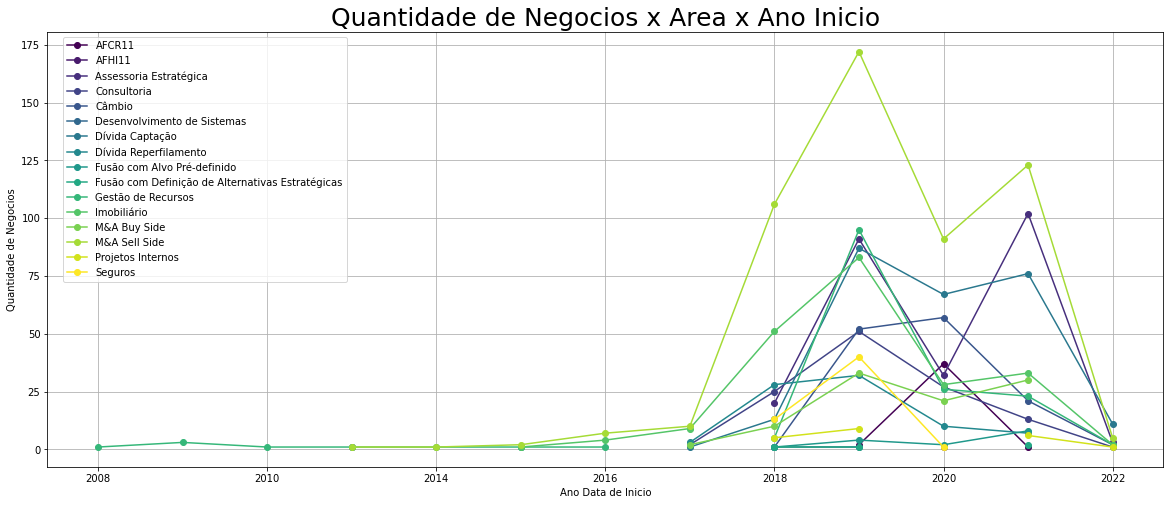

In [ ]:
grafico = df_base.groupby([df_base['data_inicio'].dt.strftime('%Y'), df_base["area"]]).agg({'nome':'count'})\
                 .sort_values(by='nome', ascending=False)\
                 .unstack().plot(figsize=(20,8), marker='o', colormap='viridis', grid=True)
grafico.set_title('Quantidade de Negocios x Area x Ano Inicio', fontsize=25)
grafico.set_xlabel('Ano Data de Inicio')
grafico.set_ylabel('Quantidade de Negocios')
handler, labels = grafico.get_legend_handles_labels()
editar_labels = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
grafico.legend(editar_labels,bbox_to_anchor=(0.01,1), loc=2)

## Coluna Tipo

### Univariada

In [ ]:
# informações da coluna
print('Informações da coluna:')
print("\n",df_base['tipo'].describe())

# dados distintos
print("\nDados distintos")
print(df_base['tipo'].unique())


Informações da coluna:

 count     1959
unique       4
top       Lead
freq       737
Name: tipo, dtype: object

Dados distintos
['Lead' 'Projeto' 'Proposta' 'Pré-Lead']


### Multivariada

- quantidade de negocios por tipo

In [ ]:
df3 = df_base.groupby(['tipo']).agg({'nome':'count'}).reset_index()
df3.rename(columns={'nome': 'T_Tipo_Neg'}, inplace=True)
df3

,tipo,T_Tipo_Neg
0,Lead,737
1,Projeto,496
2,Proposta,393
3,Pré-Lead,333



- percentual de negocios por tipo e status

In [ ]:
df4 = negocios_tipo_status = df_base.groupby(['tipo','status_atual']).agg({'nome':'count'}).reset_index()
df4.rename(columns={'nome': 'T_Tipo_Status_Neg'}, inplace=True)

g2 = pd.merge(df3, df4, how = 'inner', on = 'tipo')

g2['Percentual'] = (g2['T_Tipo_Status_Neg'] / 
                  g2['T_Tipo_Neg']) *100

g2

,tipo,T_Tipo_Neg,status_atual,T_Tipo_Status_Neg,Percentual
0,Lead,737,Ativo,334,45.32
1,Lead,737,Concluído com sucesso,7,0.95
2,Lead,737,Concluído sem sucesso,357,48.44
3,Lead,737,Inativo,39,5.29
4,Projeto,496,Ativo,152,30.65
5,Projeto,496,Concluído com sucesso,136,27.42
6,Projeto,496,Concluído sem sucesso,165,33.27
7,Projeto,496,Inativo,43,8.67
8,Proposta,393,Ativo,76,19.34
9,Proposta,393,Concluído sem sucesso,279,70.99


## Coluna Duração negócio

### Univariada

In [ ]:
# informações da coluna
print('Informações da coluna:')
print("\n",df_base['diferenca_dias_inclusao_conclusao'].describe())


Informações da coluna:

 count   1056.00
mean     276.84
std      328.77
min     -331.00
25%       60.00
50%      218.50
75%      399.75
max     4347.00
Name: diferenca_dias_inclusao_conclusao, dtype: float64


### Multivariada

- média de dias por area e status


In [ ]:
df_base[df_base["status_atual"] != 'Inativo'][df_base["status_atual"] != 'Ativo']\
       .groupby([df_base['area'], df_base["status_atual"]])\
       .agg({'diferenca_dias_inclusao_conclusao':'mean'}).reset_index()


,area,status_atual,diferenca_dias_inclusao_conclusao
0,AFCR11,Concluído com sucesso,19.75
1,AFCR11,Concluído sem sucesso,145.00
2,Assessoria Estratégica,Concluído com sucesso,409.67
3,Assessoria Estratégica,Concluído sem sucesso,285.18
4,Consultoria,Concluído com sucesso,360.42
5,Consultoria,Concluído sem sucesso,196.06
6,Câmbio,Concluído sem sucesso,294.67
7,Dívida Captação,Concluído com sucesso,315.85
8,Dívida Captação,Concluído sem sucesso,195.57
9,Dívida Reperfilamento,Concluído com sucesso,262.85


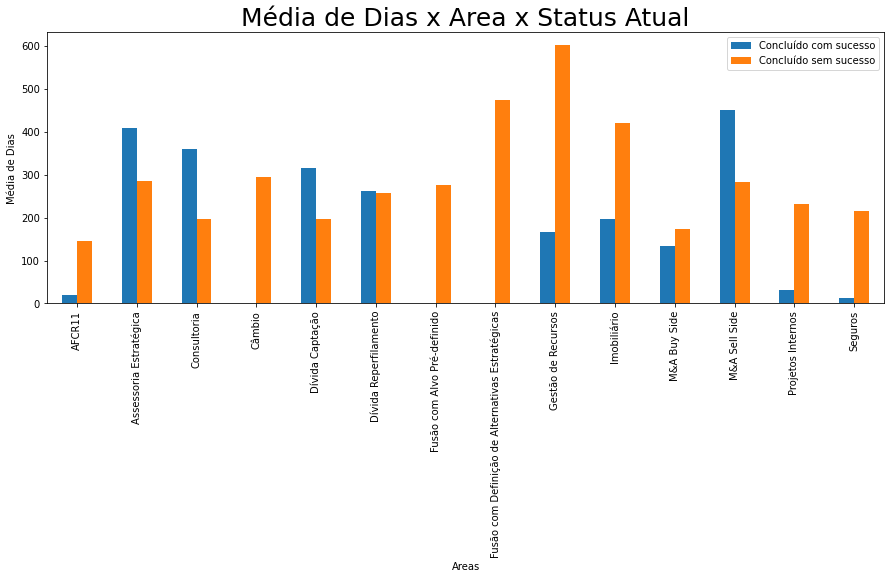

In [ ]:
grafico1 = df_base[df_base["status_atual"] != 'Inativo'][df_base["status_atual"] != 'Ativo']\
       .groupby([df_base['area'], df_base["status_atual"]])\
       .agg({'diferenca_dias_inclusao_conclusao':'mean'}).unstack().plot(figsize=(15,5), kind="bar")
grafico1.set_title('Média de Dias x Area x Status Atual', fontsize=25)
grafico1.set_xlabel('Areas')
grafico1.set_ylabel('Média de Dias')
plt.xticks(rotation=90)
handler, labels = grafico1.get_legend_handles_labels()
editar_labels1 = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
grafico1.legend(editar_labels1,bbox_to_anchor=(1,1), loc=0)

## Coluna Valor Mensal

### Univariada

In [ ]:
# informações da coluna
print('Informações da coluna:')
print("\n",df_base['valor_fee_mensal'].describe())

# dados distintos
print("\nSoma Total")
print(df_base['valor_fee_mensal'].sum())


Informações da coluna:

 count          1959.00
mean        9563206.36
std       283358660.15
min               0.00
25%               0.00
50%               0.00
75%               0.00
max     12000000000.00
Name: valor_fee_mensal, dtype: float64

Soma Total
18734321259.760002


### Multivariada

- valor mensal por tipo e area

In [ ]:
valor_mensal_por_tipo_area = df_base[df_base['valor_fee_mensal']>0].groupby(['tipo','area']).agg({
                             'valor_fee_mensal':'sum'}).reset_index()

valor_mensal_por_tipo_area.rename(columns={'valor_fee_mensal': 'Total_Feed_Mensal'}, inplace=True)
valor_mensal_por_tipo_area

,tipo,area,Total_Feed_Mensal
0,Lead,Dívida Captação,260000.00
1,Lead,Imobiliário,1680000.00
2,Projeto,AFCR11,1371205.85
3,Projeto,Assessoria Estratégica,260000.00
4,Projeto,Consultoria,2848220.95
5,Projeto,Câmbio,441.94
6,Projeto,Dívida Captação,3365875.00
7,Projeto,Dívida Reperfilamento,4936600.00
8,Projeto,Fusão com Alvo Pré-definido,730000.00
9,Projeto,Fusão com Definição de Alternativas Estratégicas,240000.00


- média dos valores mensais por tipo e area


In [ ]:
media_valor_mensal_por_tipo_area = df_base[df_base['valor_fee_mensal']>0].groupby(['tipo','area']).agg({
                             'valor_fee_mensal':'mean'}).reset_index()

media_valor_mensal_por_tipo_area.rename(columns={'valor_fee_mensal': 'Média_Feed_Mensal'}, inplace=True)
media_valor_mensal_por_tipo_area

,tipo,area,Média_Feed_Mensal
0,Lead,Dívida Captação,130000.00
1,Lead,Imobiliário,1680000.00
2,Projeto,AFCR11,1371205.85
3,Projeto,Assessoria Estratégica,86666.67
4,Projeto,Consultoria,81377.74
5,Projeto,Câmbio,441.94
6,Projeto,Dívida Captação,129456.73
7,Projeto,Dívida Reperfilamento,235076.19
8,Projeto,Fusão com Alvo Pré-definido,182500.00
9,Projeto,Fusão com Definição de Alternativas Estratégicas,240000.00


## Coluna Valor Fee Sucesso

### Univariada

In [ ]:
# informações da coluna
print('Informações da coluna:')
print("\n",df_base['valor_fee_sucesso'].describe())


Informações da coluna:

 count       1959.00
mean      474380.18
std      1581692.31
min            0.00
25%            0.00
50%            0.00
75%        95000.00
max     40000000.00
Name: valor_fee_sucesso, dtype: float64


### Multivariada

- média dos valores sucesso por tipo e area

In [ ]:
df6 = df_base[df_base['valor_fee_sucesso'] > 0]\
       .groupby([df_base['area'], df_base["tipo"]])\
       .agg({'valor_fee_sucesso':'mean'}).round(2).reset_index().sort_values(['area','valor_fee_sucesso'],ascending=False)
df6.rename(columns={'valor_fee_sucesso': 'Média_Feed_Sucesso'}, inplace=True)
df6

,area,tipo,Média_Feed_Sucesso
27,Seguros,Lead,92333.33
28,Seguros,Projeto,29391.05
29,Seguros,Proposta,7500.00
26,M&A Sell Side,Proposta,2403750.34
25,M&A Sell Side,Projeto,2295701.28
24,M&A Sell Side,Lead,1346000.00
23,M&A Buy Side,Proposta,843750.00
22,M&A Buy Side,Projeto,609605.26
21,M&A Buy Side,Lead,600000.00
20,Imobiliário,Pré-Lead,6000000.00


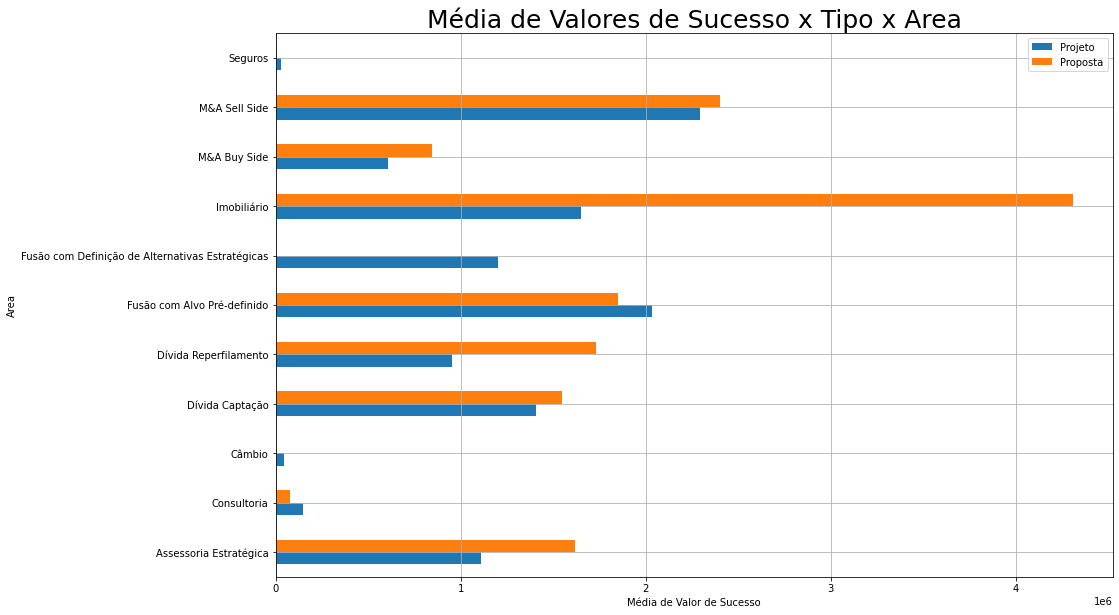

In [ ]:
grafico2 = df_base[df_base["tipo"] != 'Lead'][df_base["tipo"] != 'Pré-Lead'][df_base['valor_fee_sucesso'] > 0]\
       .groupby([df_base['area'], df_base["tipo"]])\
       .agg({'valor_fee_sucesso':'mean'}).round(2)\
       .unstack().plot(figsize=(15,10), kind='barh', grid=True)
grafico2.set_title('Média de Valores de Sucesso x Tipo x Area', fontsize=25)
grafico2.set_xlabel('Média de Valor de Sucesso')
grafico2.set_ylabel('Area')
plt.xticks(rotation=0)
handler, labels = grafico2.get_legend_handles_labels()
editar_labels2 = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
grafico2.legend(editar_labels2,bbox_to_anchor=(1,1), loc=0)

- Total de Valor Mensal por Tipo e Area

In [ ]:
df7 = df_base[df_base['valor_fee_mensal'] > 0]\
       .groupby([df_base['area'], df_base["tipo"]])\
       .agg({'valor_fee_mensal':'sum'}).round(2).sort_values(['area','valor_fee_mensal'],ascending=False).reset_index()

df7.rename(columns={'valor_fee_mensal': 'Total_Feed_Sucesso'}, inplace=True)
df7

,area,tipo,Total_Feed_Sucesso
0,Seguros,Projeto,237620.00
1,M&A Sell Side,Proposta,2382217000.00
2,M&A Sell Side,Projeto,13729367.20
3,M&A Buy Side,Proposta,16192000.00
4,M&A Buy Side,Projeto,2587000.00
5,Imobiliário,Lead,1680000.00
6,Imobiliário,Proposta,720000.00
7,Imobiliário,Projeto,582500.00
8,Imobiliário,Pré-Lead,360000.00
9,Gestão de Recursos,Projeto,17947428.82


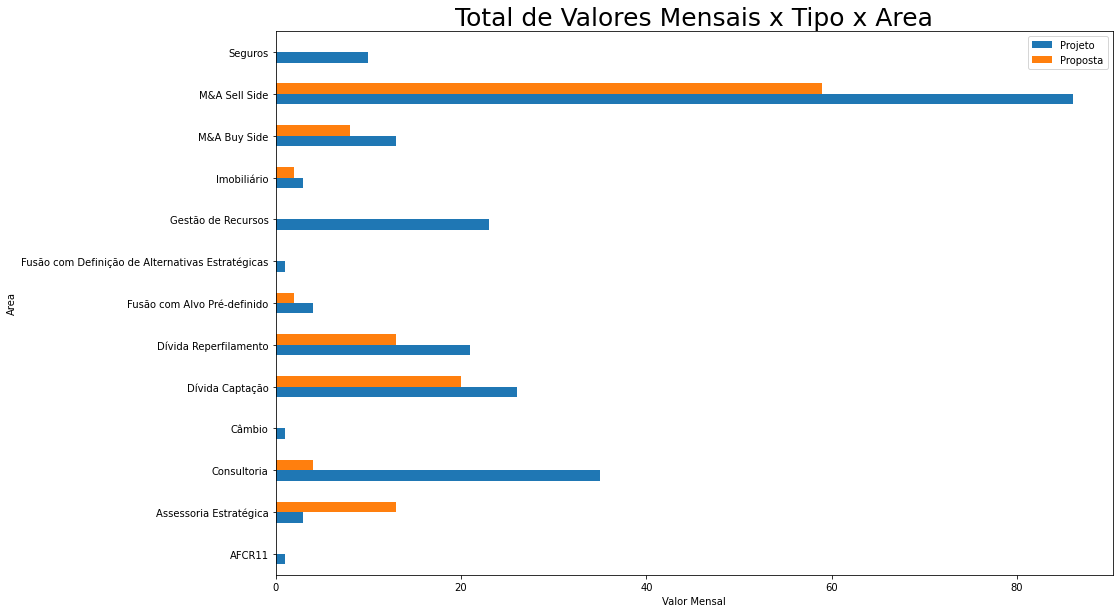

In [ ]:
grafico3 = df_base[df_base["tipo"] != 'Lead'][df_base["tipo"] != 'Pré-Lead'][df_base['valor_fee_mensal'] > 0]\
        .groupby([df_base['area'], df_base["tipo"]])\
        .agg({'valor_fee_mensal':'count'})\
        .unstack().plot(figsize=(15,10), kind='barh')
grafico3.set_title('Total de Valores Mensais x Tipo x Area', fontsize=25)
grafico3.set_xlabel('Valor Mensal')
grafico3.set_ylabel('Area')
plt.xticks(rotation=0)
handler3, labels3 = grafico3.get_legend_handles_labels()
editar_labels3 = [re.search(',\s(.+?)\)', label).group(1) for label in labels3]
grafico3.legend(editar_labels3,bbox_to_anchor=(1,1), loc=0)

## Coluna Valor Transação

### Univariada

In [ ]:
# informações da coluna
print('Informações da coluna:')
print("\n",df_base['valor_da_transacao'].describe())

# Valor total
print("\nValor Total")
print(df_base['valor_da_transacao'].sum())


Informações da coluna:

 count         1959.00
mean      30038762.85
std      159619516.27
min              0.00
25%              0.00
50%              0.00
75%       13000000.00
max     5000000000.00
Name: valor_da_transacao, dtype: float64

Valor Total
58845936427.5


### Multivariada

- valor de transação por tipo e area

In [ ]:
df8 = df_base[df_base['valor_da_transacao']>0].groupby(['tipo','area']).agg({
                             'valor_da_transacao': 'sum'}).reset_index().sort_values(['tipo','valor_da_transacao'],ascending=False)

df8.rename(columns={'valor_da_transacao': 'Total_Valor_Transação'}, inplace=True)
df8

,tipo,area,Total_Valor_Transação
31,Pré-Lead,Imobiliário,300000000.00
30,Pré-Lead,Dívida Captação,100000000.00
28,Proposta,M&A Sell Side,6847355000.00
23,Proposta,Dívida Captação,2198000000.00
26,Proposta,Imobiliário,1206000000.00
21,Proposta,Assessoria Estratégica,864500000.00
24,Proposta,Dívida Reperfilamento,841790000.00
27,Proposta,M&A Buy Side,315000000.00
25,Proposta,Fusão com Alvo Pré-definido,200000000.00
22,Proposta,Consultoria,30040000.00


- média dos valores de transação por tipo e area

In [ ]:
df8 = df_base[df_base['valor_da_transacao']>0].groupby(['tipo','area']).agg({
                             'valor_da_transacao':'mean'}).reset_index().sort_values(['tipo','valor_da_transacao'],ascending=False)

df8.rename(columns={'valor_da_transacao': 'Média_Valor_Transação'}, inplace=True)
df8

,tipo,area,Média_Valor_Transação
31,Pré-Lead,Imobiliário,300000000.00
30,Pré-Lead,Dívida Captação,100000000.00
25,Proposta,Fusão com Alvo Pré-definido,200000000.00
26,Proposta,Imobiliário,134000000.00
28,Proposta,M&A Sell Side,92531824.32
23,Proposta,Dívida Captação,68687500.00
24,Proposta,Dívida Reperfilamento,60127857.14
21,Proposta,Assessoria Estratégica,54031250.00
27,Proposta,M&A Buy Side,39375000.00
22,Proposta,Consultoria,15020000.00


# Insights com a target

- insight da base, ex:
  

- Duração dos negócios que não estão inativos é um fator decisório na classificação do interesse

Text(0.5, 0, 'Prazo Negócios')

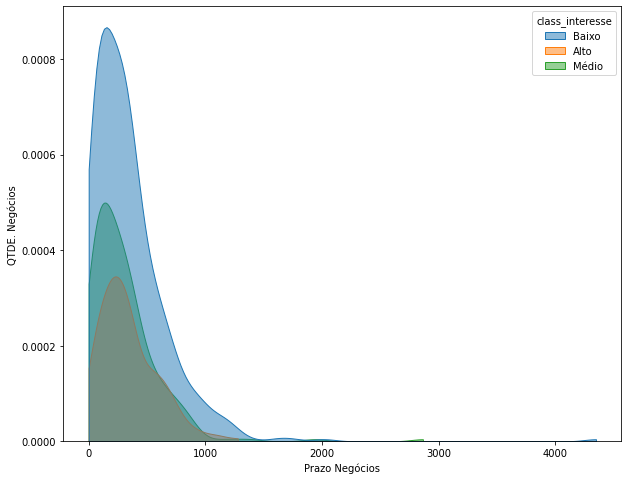

In [ ]:
base_g0 = df_base.query("diferenca_dias_inclusao_conclusao > 0 & status_atual != 'Inativo'")
plt.rcParams["figure.figsize"]=10,8
sns.kdeplot(data=base_g0, x="diferenca_dias_inclusao_conclusao", hue="class_interesse", fill=True, cut=0, alpha=.5)
plt.ylabel('QTDE. Negócios')
plt.xlabel('Prazo Negócios')


- Tendência do valor de transação conforme o interesse 
(ex: negocios com interesses mais baixos são aqueles com valor de transação menores)

Text(0.5, 20.80000000000002, 'Valor Transações')

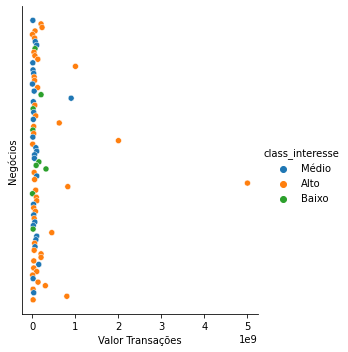

In [ ]:
base_g1 = df_base.where((df_base['valor_da_transacao']>0) & (df_base['status_atual'] != 'Ativo') & (df_base['status_atual'] != 'Inativo')).dropna().sort_values('data_inicio', ascending=False)
sns.relplot(data=base_g1, x="valor_da_transacao", y="nome", hue="class_interesse" , kind="scatter", height=5)
plt.yticks([])
plt.ylabel('Negócios')
plt.xlabel('Valor Transações')


- interesse de acordo com a area (se determinada area tende a ter um maior interesse)

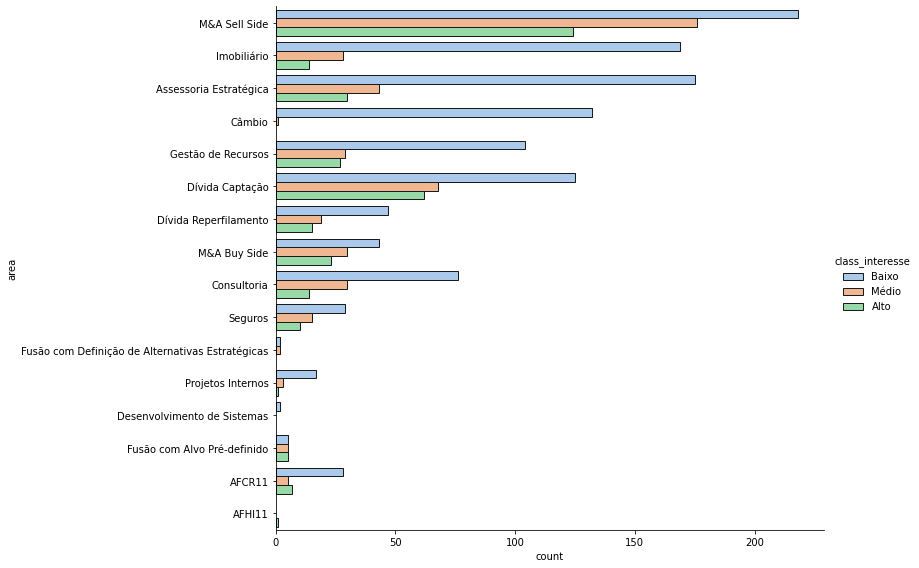

In [ ]:
df_ultimos_negocios_area = df_base[['area','interesse(target)', 'data_inicio', 'class_interesse', 'class_interesse_cat']].sort_values(by='data_inicio', ascending=False).head(100)
sns.catplot(y="area", hue="class_interesse", kind="count",
            palette="pastel", edgecolor=".10",size=8, aspect = 1.5,
            data=df_base)


- como o status afeta o interesse (ex: negocios com maior interesse tendem a ser concluidos com sucesso)

In [ ]:
grafico4 = pd.DataFrame(df_base.groupby([df_base['status_atual'], df_base["class_interesse"]]).agg({'nome':'count'})\
                 .sort_values(by='status_atual', ascending=False)).reset_index()
grafico4.rename(columns={'nome': 'T_Status_Class_Neg'}, inplace=True)
print(grafico4)

             status_atual class_interesse  T_Status_Class_Neg
0                 Inativo            Alto                  12
1                 Inativo           Baixo                  78
2                 Inativo           Médio                  36
3   Concluído sem sucesso            Alto                 160
4   Concluído sem sucesso           Baixo                 484
5   Concluído sem sucesso           Médio                 268
6   Concluído com sucesso            Alto                  49
7   Concluído com sucesso           Baixo                  64
8   Concluído com sucesso           Médio                  30
9                   Ativo            Alto                 112
10                  Ativo           Baixo                 546
11                  Ativo           Médio                 120


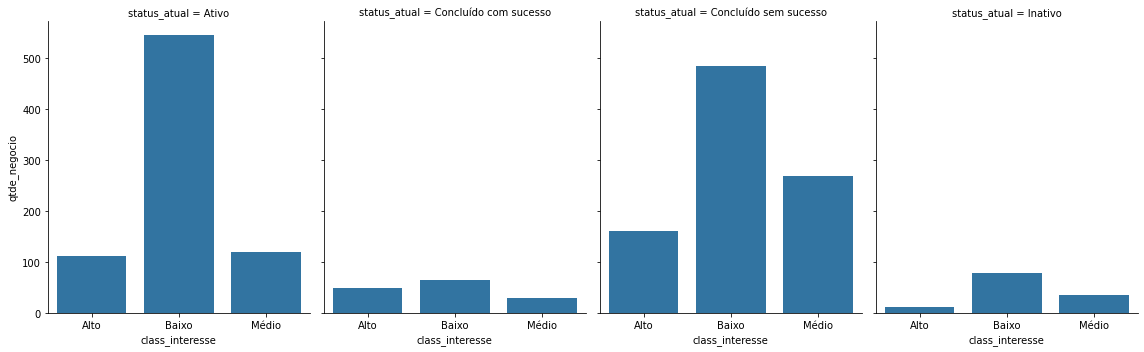

In [ ]:
#O status afeta o nivel de interesse?
grafico4 = df_base.groupby([df_base['status_atual'], df_base["class_interesse"]], as_index=False).agg({'nome':'count'}).sort_values(by='class_interesse')
grafico4.columns=['status_atual', 'class_interesse','qtde_negocio']
g = sns.FacetGrid(grafico4, col='status_atual', height=5, aspect=0.8, )
g = g.map(sns.barplot ,'class_interesse','qtde_negocio')

- interesse ao longo do mes/ano (se o tempo é um fator decisorio na classificação do interesse......ex: ao longos dos anos o interesse veio aumentando ou diminuindo)

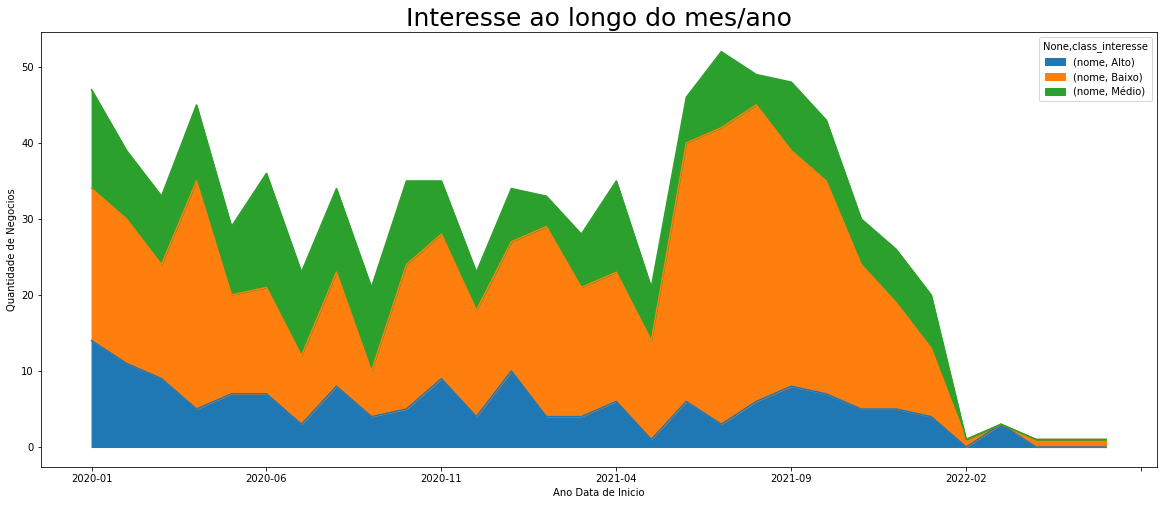

In [ ]:
##Interesse ao longo do mes/ano
grafico5 = df_base[df_base['data_inicio'] >'2020-01-01']\
.groupby([df_base['data_inicio'].dt.strftime('%Y-%m'), df_base['class_interesse']])\
.agg({'nome':'count'})\
                .sort_values(by='data_inicio', ascending=True)\
                .unstack().plot(figsize=(20,8), kind='area')
grafico5.set_title('Interesse ao longo do mes/ano', fontsize=25)
grafico5.set_xlabel('Ano Data de Inicio')
grafico5.set_ylabel('Quantidade de Negocios')
handler, labels = grafico5.get_legend_handles_labels()
editar_labels5 = [re.search(',\s(.+?)\)', label).group(1) for label in labels]
grafico.legend(editar_labels5,bbox_to_anchor=(1,1), loc=0)

- interesse de acordo com qtde_negocios_com_o_cliente (se quanto maior a qtde de negocios com o cliente o interesse tambem é maior)

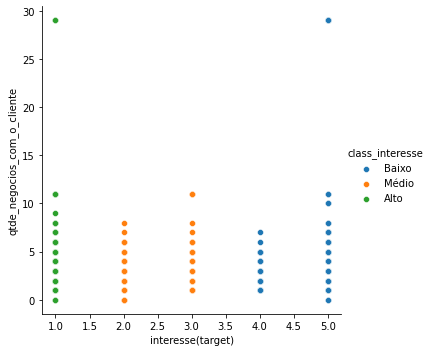

In [ ]:
#interesse de acordo com qtde_negocios_com_o_cliente
g = sns.FacetGrid(df_base, hue='class_interesse', size=5)
g.map(sns.scatterplot,'interesse(target)','qtde_negocios_com_o_cliente')
g.add_legend()

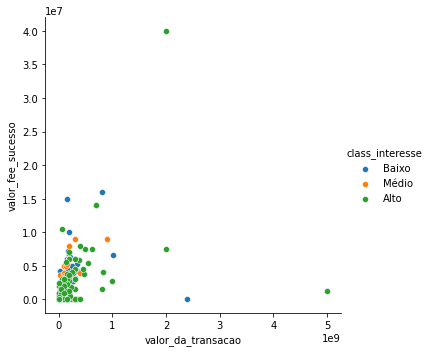

In [ ]:
#interesse segue a tendencia entre valor de transação e valor fee de sucesso
g = sns.FacetGrid(df_base, hue='class_interesse', size=5, )
g.map(sns.scatterplot,'valor_da_transacao','valor_fee_sucesso')
g.add_legend()

#Contrução, validação e avaliação do Modelo

Colunas para modelo: escritorio_cat,area_cat,tipo_cat,class_interesse_cat,qtde_negocios_com_o_cliente, valor_da_transacao

In [ ]:
#Coluna Escritório
df_base[['escritorio','escritorio_cat']].groupby('escritorio').agg({'escritorio_cat':'max'}).reset_index()

,escritorio,escritorio_cat
0,Araujo Fontes BH,0
1,Araujo Fontes Goiânia,1
2,Araujo Fontes Rib. Preto,2
3,Araujo Fontes São Paulo,3


In [ ]:
#Coluna Area
df_base[['area','area_cat']].groupby('area').agg({'area_cat':'max'}).reset_index()

,area,area_cat
0,AFCR11,0
1,AFHI11,1
2,Assessoria Estratégica,2
3,Consultoria,3
4,Câmbio,4
5,Desenvolvimento de Sistemas,5
6,Dívida Captação,6
7,Dívida Reperfilamento,7
8,Fusão com Alvo Pré-definido,8
9,Fusão com Definição de Alternativas Estratégicas,9


In [ ]:
#Coluna Tipo
df_base[['tipo','tipo_cat']].groupby('tipo').agg({'tipo_cat':'max'}).reset_index()

,tipo,tipo_cat
0,Lead,0
1,Projeto,1
2,Proposta,2
3,Pré-Lead,3


- Reclassificar a coluna class_interesse_cat para class_interesse_alto quando class_interesse_cat for igual a 1, caso contrário classificar com zero, repectivamente True e False

In [ ]:
df_base[['class_interesse','class_interesse_cat']].groupby('class_interesse').agg({'class_interesse_cat':'max'}).reset_index()

for i,row in df_base.iterrows():
    if  row['class_interesse_cat'] == 0:        
        df_base.at[i,'class_interesse_alto'] = int(1)
    else:
      df_base.at[i,'class_interesse_alto'] = int(0)


In [ ]:
df_base[['class_interesse_cat','class_interesse_alto']].groupby('class_interesse_cat').agg({'class_interesse_alto':'max'}).reset_index()

,class_interesse_cat,class_interesse_alto
0,0,1.00
1,1,0.00
2,2,0.00


In [ ]:
#Preparando DataFrame para o modelo
df_base_modelo = df_base[['escritorio_cat','area_cat','tipo_cat','class_interesse_alto','qtde_negocios_com_o_cliente','valor_da_transacao']]
df_base_modelo['class_interesse_alto'] = df_base_modelo["class_interesse_alto"].astype(int)

#X= df_base_modelo[['escritorio_cat','area_cat','tipo_cat','qtde_negocios_com_o_cliente','valor_da_transacao']]
#Y= df_base_modelo[['class_interesse_alto']]

X2= df_base_modelo[['area_cat','tipo_cat','qtde_negocios_com_o_cliente','valor_da_transacao']]
Y2= df_base_modelo[['class_interesse_alto']]

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2)

X_train, X_test, y_train, y_test = train_test_split(X2,Y2,test_size=0.2)

In [ ]:
classifiers=[]
# MODELO 1 - XGB
param_grid1 = {'n_estimators': [400, 700, 1000],
               'colsample_bytree': [0.7, 0.8],
               'max_depth': [15,20,25],
               'reg_alpha': [1.1, 1.2, 1.3],
               'reg_lambda': [1.1, 1.2, 1.3],
               'subsample': [0.7, 0.8, 0.9]
              }
model1 = xgboost.XGBClassifier()
classifiers.append(tuple([model1,param_grid1]))

## MODELO 2 - Decision Tree
param_grid2 = {'criterion': ['entropy', 'gini'], 
                'max_depth':range(1,20),
                #'n_estimators':[90,100,115,130],
                'min_samples_leaf': range(1,4)
              }
model2 = tree.DecisionTreeClassifier()
classifiers.append(tuple([model2,param_grid2]))

## MODELO 3 - Random Forest
param_grid3 = {'bootstrap': [True, False],
               'criterion': ['entropy', 'gini'],
               'max_depth': range(1,20),
               'max_features': ['auto'],
               'min_samples_leaf': [1, 2, 4],
               'min_samples_split': [2, 5, 10],
               'n_estimators': [90,100,115,130]
              }
model3 = RandomForestClassifier()
classifiers.append(tuple([model3,param_grid3]))

## MODELO 4 - LGBM
param_grid4 ={'num_leaves': range(1, 20),
             'boosting_type': ['gbdt'],
             'max_depth': range(1,20),
             'n_estimators':[90,100,115,130],
             'min_data_in_leaf':[20]
            }
model4 = lgb.LGBMClassifier()
classifiers.append(tuple([model4,param_grid4]))

In [ ]:
classifiers

[(XGBClassifier(),
  {'colsample_bytree': [0.7, 0.8],
   'max_depth': [15, 20, 25],
   'n_estimators': [400, 700, 1000],
   'reg_alpha': [1.1, 1.2, 1.3],
   'reg_lambda': [1.1, 1.2, 1.3],
   'subsample': [0.7, 0.8, 0.9]}),
 (DecisionTreeClassifier(),
  {'criterion': ['entropy', 'gini'],
   'max_depth': range(1, 20),
   'min_samples_leaf': range(1, 4)}),
 (RandomForestClassifier(),
  {'bootstrap': [True, False],
   'criterion': ['entropy', 'gini'],
   'max_depth': range(1, 20),
   'max_features': ['auto'],
   'min_samples_leaf': [1, 2, 4],
   'min_samples_split': [2, 5, 10],
   'n_estimators': [90, 100, 115, 130]}),
 (LGBMClassifier(),
  {'boosting_type': ['gbdt'],
   'max_depth': range(1, 20),
   'min_data_in_leaf': [20],
   'n_estimators': [90, 100, 115, 130],
   'num_leaves': range(1, 20)})]

In [ ]:
mod=[]
for modelo, parametros in classifiers:
  print("-------------- MODELO - %s --------\n"%(modelo))
  gs = GridSearchCV(
            estimator=modelo,
            param_grid=parametros, 
            cv=3, 
            n_jobs=-1,
            verbose=2)
  fitted_model = gs.fit(X_train, y_train)

  print("#Acurácia do Teste:             \n ",fitted_model.best_score_)
  print("#Melhores Parametros para o modelo:\n ",fitted_model.best_params_)
  
  y_pred= fitted_model.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  print("#Acurácia do Modelo:              \n %s"%(acc))

  mod.append({'modelo':modelo, 'melho_modelo':fitted_model, 'y_pred':y_pred})

  cm = confusion_matrix(y_test, y_pred)
  tn, fp, fn, tp = cm.ravel()
  cm_reorganizada = np.array([[tp, fn], [fp, tn]])
  print("#Matriz de Confusão:              \n %s"%(cm_reorganizada))


-------------- MODELO - XGBClassifier() --------

Fitting 3 folds for each of 486 candidates, totalling 1458 fits
#Acurácia do Teste:             
  0.8404662656986782
#Melhores Parametros para o modelo:
  {'colsample_bytree': 0.8, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.3, 'reg_lambda': 1.2, 'subsample': 0.8}
#Acurácia do Modelo:              
 0.8035714285714286
#Matriz de Confusão:              
 [[ 12  62]
 [ 15 303]]
-------------- MODELO - DecisionTreeClassifier() --------

Fitting 3 folds for each of 114 candidates, totalling 342 fits
#Acurácia do Teste:             
  0.8442915784512671
#Melhores Parametros para o modelo:
  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
#Acurácia do Modelo:              
 0.8035714285714286
#Matriz de Confusão:              
 [[  4  70]
 [  7 311]]
-------------- MODELO - RandomForestClassifier() --------

Fitting 3 folds for each of 2736 candidates, totalling 8208 fits
#Acurácia do Teste:             
  0.84684219394

#Interpretação dos Resultados


## Resultados obtidos na análise
### Exploração de dados 




MODELO - XGBClassifier()
#Melhores Parametros do Modelo:  {'colsample_bytree': 0.8, 'max_depth': 15, 'n_estimators': 400, 'reg_alpha': 1.3, 'reg_lambda': 1.2, 'subsample': 0.8}
#Acurácaia do Teste:             84.05 %
#Acurácia do Modelo:             80.36 %

#Visualização da importacia de cada campo para o modelo:


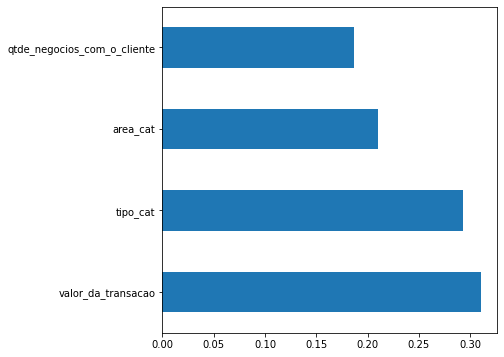


#Visualização da Matriz de Confusão:


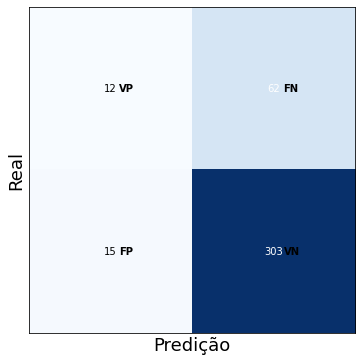


#Visualizaçaõ do relatório de classificação:
               precision    recall  f1-score   support

0 - Não Altos       0.83      0.95      0.89       318
    1 - Altos       0.44      0.16      0.24        74

     accuracy                           0.80       392
    macro avg       0.64      0.56      0.56       392
 weighted avg       0.76      0.80      0.76       392
 

------------------------------------------------------------------------------------------------------------

MODELO - DecisionTreeClassifier()
#Melhores Parametros do Modelo:  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1}
#Acurácaia do Teste:             84.43 %
#Acurácia do Modelo:             80.36 %

#Visualização da importacia de cada campo para o modelo:


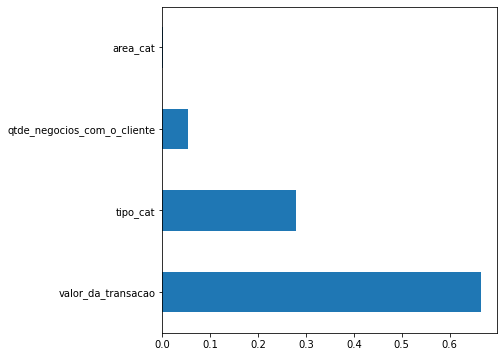


#Visualização da Matriz de Confusão:


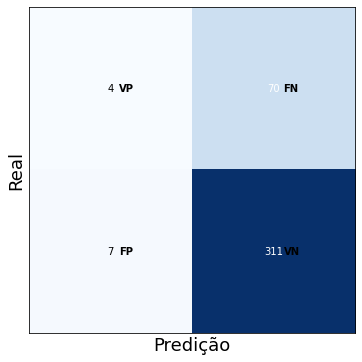


#Visualizaçaõ do relatório de classificação:
               precision    recall  f1-score   support

0 - Não Altos       0.82      0.98      0.89       318
    1 - Altos       0.36      0.05      0.09        74

     accuracy                           0.80       392
    macro avg       0.59      0.52      0.49       392
 weighted avg       0.73      0.80      0.74       392
 

------------------------------------------------------------------------------------------------------------

MODELO - RandomForestClassifier()
#Melhores Parametros do Modelo:  {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 90}
#Acurácaia do Teste:             84.68 %
#Acurácia do Modelo:             79.85 %

#Visualização da importacia de cada campo para o modelo:


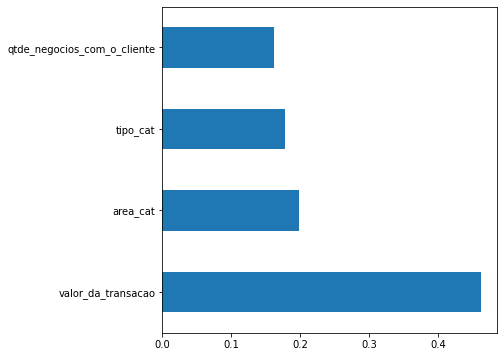


#Visualização da Matriz de Confusão:


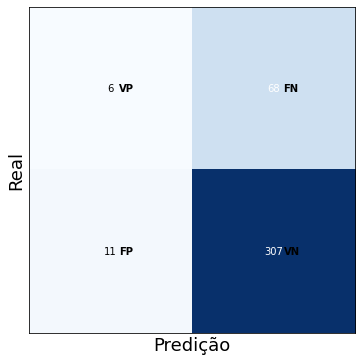


#Visualizaçaõ do relatório de classificação:
               precision    recall  f1-score   support

0 - Não Altos       0.82      0.97      0.89       318
    1 - Altos       0.35      0.08      0.13        74

     accuracy                           0.80       392
    macro avg       0.59      0.52      0.51       392
 weighted avg       0.73      0.80      0.74       392
 

------------------------------------------------------------------------------------------------------------

MODELO - LGBMClassifier()
#Melhores Parametros do Modelo:  {'boosting_type': 'gbdt', 'max_depth': 2, 'min_data_in_leaf': 20, 'n_estimators': 115, 'num_leaves': 3}
#Acurácaia do Teste:             84.62 %
#Acurácia do Modelo:             80.1 %

#Visualização da importacia de cada campo para o modelo:


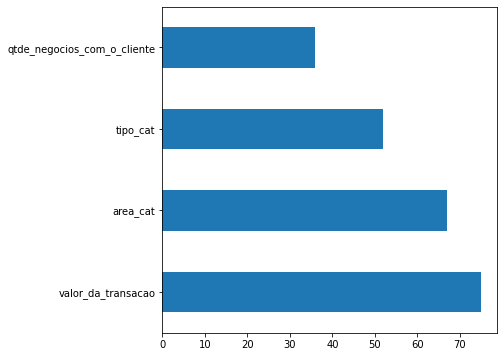


#Visualização da Matriz de Confusão:


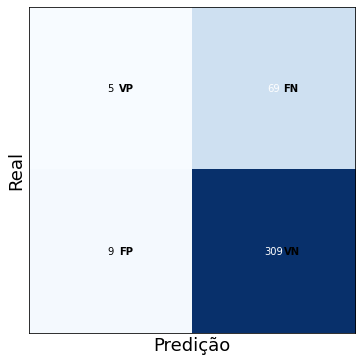


#Visualizaçaõ do relatório de classificação:
               precision    recall  f1-score   support

0 - Não Altos       0.82      0.97      0.89       318
    1 - Altos       0.36      0.07      0.11        74

     accuracy                           0.80       392
    macro avg       0.59      0.52      0.50       392
 weighted avg       0.73      0.80      0.74       392
 

------------------------------------------------------------------------------------------------------------



In [ ]:
#Exploração dos dados coletados dos 4 modelos analisados.

for i in mod:
  print('MODELO -',i['modelo'])
  print('#Melhores Parametros do Modelo: ',i['melho_modelo'].best_params_)
  print('#Acurácaia do Teste:            ',round(i['melho_modelo'].best_score_*100, 2),'%')
  print('#Acurácia do Modelo:            ',round(accuracy_score(y_test, i['y_pred'])*100, 2),'%')
  print("\n#Visualização da importacia de cada campo para o modelo:")
  best_rf = i['melho_modelo'].best_estimator_
  feat_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
  feat_importances.nlargest(10).plot(kind='barh', figsize=(6, 6))
  plt.show()

  print("\n#Visualização da Matriz de Confusão:")
  conf_matrix = confusion_matrix(y_true=y_test, y_pred=i['y_pred'])
  tn, fp, fn, tp = conf_matrix.ravel()
  cm_reorganizada = np.array([[tp, fn], [fp, tn]])
  fig, ax = plot_confusion_matrix(conf_mat=cm_reorganizada, figsize=(6, 6))
  plt.xticks([])
  plt.yticks([])
  plt.annotate('VP', (0.05,0.02), fontweight='bold')
  plt.annotate('FN', (1.06,0.02), fontweight='bold')
  plt.annotate('FP', (0.05,1.02), fontweight='bold')
  plt.annotate('VN', (1.06,1.02), fontweight='bold')
  plt.xlabel('Predição', fontsize=18)
  plt.ylabel('Real', fontsize=18)
  plt.show()
  
  print('\n#Visualizaçaõ do relatório de classificação:')
  target_names = ['0 - Não Altos', '1 - Altos']
  print(classification_report(y_test, i['y_pred'], target_names=target_names),'\n')
  
  print('------------------------------------------------------------------------------------------------------------\n')
  